In [30]:
# 📦 Imports
import pandas as pd
import numpy as np
import os
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.losses import MeanSquaredError

In [31]:
# 📥 Load Data
df = pd.read_csv("../data/network_traffic.csv")
df.dropna(inplace=True)
df = df.select_dtypes(include=[np.number])
df.reset_index(drop=True, inplace=True)

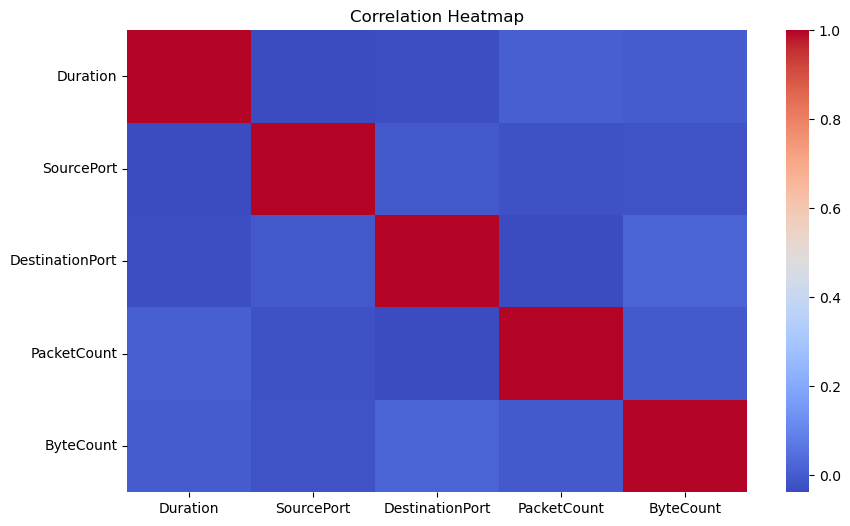

In [32]:
# 🔥 Optional: Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [33]:
# ⚙️ Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [34]:
# 🌲 Isolation Forest
isf = IsolationForest(contamination=0.05, random_state=42)
df['isf_anomaly'] = isf.fit_predict(X_scaled)
df['isf_anomaly'] = df['isf_anomaly'].apply(lambda x: 1 if x == -1 else 0)

In [35]:
# Save Isolation Forest
os.makedirs("../models", exist_ok=True)
joblib.dump(isf, "../models/isolation_forest.pkl")
print("✅ Isolation Forest saved at: ../models/isolation_forest.pkl")

✅ Isolation Forest saved at: ../models/isolation_forest.pkl


In [36]:
# 🧠 Autoencoder
input_dim = X_scaled.shape[1]
encoding_dim = 14

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='linear')(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss=MeanSquaredError())

X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)
autoencoder.fit(X_train, X_train,
                epochs=20,
                batch_size=32,
                validation_data=(X_test, X_test),
                verbose=1)

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9988 - val_loss: 0.7710
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7500 - val_loss: 0.5703
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5585 - val_loss: 0.4195
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4104 - val_loss: 0.3008
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2931 - val_loss: 0.2102
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2134 - val_loss: 0.1436
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1436 - val_loss: 0.0984
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0966 - val_loss: 0.0711
Epoch 9/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0744 - val_loss: 0.0548
Epoch 10/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0582 - val_loss: 0.0452
Epoch 11/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0471 - val_loss: 0.0390
Epoch 12/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0409 - val_lo

In [37]:
# Save Autoencoder
autoencoder.save("../models/autoencoder_model.h5")
print("✅ Autoencoder saved at: ../models/autoencoder_model.h5")

✅ Autoencoder saved at: ../models/autoencoder_model.h5
